In [1]:
import pandas as pd
import numpy as np
import os
import csv
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [2]:
dir_loc = '/Users/mashihao/Desktop/Stocks'
file_loc = [dir_loc + '/' + os.listdir(dir_loc)[i] for i in range(len(os.listdir(dir_loc)))]
ticker = [item[:-4] for item in os.listdir(dir_loc)]

In [3]:
df = pd.read_csv(file_loc[0],sep= '\t'and ',') 
data = pd.DataFrame(df['Date'])
data.set_index('Date')
n = 50

for i in range(n):
    df = pd.read_csv(file_loc[i], sep= '\t'and ',') 
    temp = df.loc[:, ['Date', 'Close']]
    temp.columns = ['Date', ticker[i]]
    data = pd.merge(data, temp, on= 'Date', how='inner') 

data.shape

(902, 51)

In [4]:
data_ex_Date = data.drop('Date', 1)

In [5]:
returns = np.log(data_ex_Date / data_ex_Date.shift(1))
returns

,CSCO,SBGI,ISSC,IDSY,AEIS,TROW,ISRG,PRGX,AMSC,ADTN,...,DAIO,DGII,EMCI,DISH,RGEN,LABL,CPST,STAF,LJPC,ULBI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.007397,-0.020307,0.021774,-0.004494,0.021497,-0.001165,-0.006391,-0.048353,0.098031,-0.000918,...,-0.002963,-0.003235,-0.040575,-0.008542,0.015038,-0.001264,0.003780,-0.031749,-0.028032,-0.042421
2,-0.020121,-0.029909,0.003072,-0.021245,-0.032528,-0.023239,-0.021540,0.007313,-0.033729,-0.001838,...,0.000000,-0.003245,0.009353,-0.025648,0.018241,-0.023582,-0.016439,-0.000161,-0.008396,0.006645
3,-0.000370,-0.015492,-0.066586,-0.001535,-0.043153,-0.017821,0.010482,-0.023964,0.012579,-0.014829,...,-0.002972,-0.031923,-0.012883,-0.025449,-0.030253,-0.001110,0.015361,0.031910,-0.054879,-0.003317
4,0.009200,-0.005872,0.019481,-0.026461,-0.007152,0.014594,0.005468,0.011132,-0.006270,0.004658,...,0.014771,0.008909,-0.000885,-0.003063,0.003017,0.025596,-0.010578,0.015504,0.063276,0.039093
5,0.007663,0.009768,0.083253,0.020297,0.022184,0.011784,0.019629,0.012832,0.029742,-0.003724,...,-0.048057,-0.013393,0.011146,0.025312,0.207765,0.045863,0.014751,0.059719,0.032358,-0.039093
6,0.010127,0.010828,-0.036149,-0.012457,0.043364,-0.007662,-0.023021,-0.009149,-0.011050,-0.007491,...,0.006135,-0.035453,-0.010849,0.022183,-0.011485,0.000517,-0.005793,0.014246,0.066291,0.009917
7,0.009312,-0.010050,-0.021706,-0.036642,0.007535,-0.011211,0.008869,-0.029853,-0.032625,-0.006601,...,-0.003063,0.004646,-0.002658,-0.007129,0.042800,-0.019138,-0.013741,-0.154008,0.046864,0.051293
8,0.001603,0.005424,0.003130,-0.006515,-0.017670,0.001566,-0.007353,0.003781,-0.025187,0.049826,...,0.003063,0.014951,0.002361,0.006781,-0.010729,0.005256,0.016305,-0.001835,-0.033818,-0.048009
9,-0.006248,-0.041418,-0.023717,0.012987,-0.001274,-0.015714,0.025923,0.001885,0.007039,0.015186,...,0.000000,-0.006873,0.025051,-0.018636,-0.017329,0.043760,-0.009479,-0.032239,0.033336,0.013030


In [6]:
returns.mean()*252

CSCO    0.129854
SBGI    0.049010
ISSC   -0.029664
IDSY   -0.011958
AEIS    0.261004
TROW    0.104356
ISRG    0.286162
PRGX    0.129861
AMSC   -0.019869
ADTN   -0.096297
DRRX    0.286735
NBIX    0.425610
VRTX    0.074429
GILD   -0.082307
AMKR    0.071556
FCFS    0.141412
EQIX    0.157912
STMP    0.494412
QUIK   -0.253176
SALM   -0.157683
HMSY    0.025283
MCRI    0.278594
SGMO    0.008868
LPTH    0.240563
ICUI    0.370386
MCHP    0.228135
NVMI    0.292721
TUES   -0.562903
IVAC   -0.140602
ARDM   -0.433186
ABCB    0.220235
HUBG    0.088747
CORT    0.521796
EGOV   -0.028451
CASH    0.310787
LNDC    0.009752
PEGA    0.300409
ARQL    0.393966
RCII   -0.309047
CCRN   -0.000898
DAIO    0.190117
DGII    0.076215
EMCI    0.037170
DISH   -0.208315
RGEN    0.230983
LABL    0.068303
CPST   -0.632629
STAF   -0.846736
LJPC    0.140038
ULBI    0.304576
dtype: float64

In [7]:
returns.cov()*252

,CSCO,SBGI,ISSC,IDSY,AEIS,TROW,ISRG,PRGX,AMSC,ADTN,...,DAIO,DGII,EMCI,DISH,RGEN,LABL,CPST,STAF,LJPC,ULBI
CSCO,0.044061,0.019085,0.008337,0.007449,0.027091,0.021368,0.017829,0.011255,0.012626,0.018587,...,0.010751,0.016798,0.012901,0.021151,0.022488,0.014342,0.017420,0.007568,0.014464,0.010264
SBGI,0.019085,0.099709,0.003284,0.012097,0.021800,0.026649,0.013097,0.016747,0.015058,0.016230,...,0.006254,0.023586,0.014523,0.033871,0.022972,0.017355,0.021141,0.003589,0.028860,0.018200
ISSC,0.008337,0.003284,0.195918,0.003365,0.012121,0.006200,0.008848,0.018859,0.008428,0.005618,...,0.014589,0.005323,0.000695,0.011995,0.009031,0.014879,0.029645,0.021043,0.017311,0.014902
IDSY,0.007449,0.012097,0.003365,0.173444,0.012701,0.005014,0.002714,-0.009521,0.012589,0.012392,...,0.010541,0.003813,0.006285,0.009917,0.011996,0.000001,0.044884,0.010918,0.035352,0.000830
AEIS,0.027091,0.021800,0.012121,0.012701,0.096038,0.023356,0.023972,0.011753,0.022420,0.024028,...,0.028122,0.025499,0.015101,0.023556,0.042147,0.023061,0.021723,-0.002759,0.046704,0.015164
TROW,0.021368,0.026649,0.006200,0.005014,0.023356,0.042669,0.014492,0.013355,0.021407,0.014477,...,0.004071,0.021900,0.015057,0.019991,0.028343,0.017464,0.025736,-0.002344,0.026475,0.011026
ISRG,0.017829,0.013097,0.008848,0.002714,0.023972,0.014492,0.049183,0.011337,0.014330,0.008201,...,0.014228,0.010551,0.006909,0.013592,0.026347,0.006673,0.014471,0.010428,0.028097,0.005692
PRGX,0.011255,0.016747,0.018859,-0.009521,0.011753,0.013355,0.011337,0.138276,0.016912,0.003989,...,-0.004082,0.011649,0.008362,0.015209,0.011884,0.007532,0.017945,0.001623,0.015708,0.003293
AMSC,0.012626,0.015058,0.008428,0.012589,0.022420,0.021407,0.014330,0.016912,0.461915,0.022570,...,-0.023307,0.019556,0.014182,0.014215,0.018621,0.012515,0.059241,0.083021,0.033572,0.009635
ADTN,0.018587,0.016230,0.005618,0.012392,0.024028,0.014477,0.008201,0.003989,0.022570,0.080249,...,0.015097,0.018742,0.014238,0.013663,0.014813,0.014785,0.031482,0.009968,0.013357,0.006866


In [8]:
port_returns = []
port_variance = []
for p in range(10000):
    weights = np.random.random(n)
    weights /=np.sum(weights)
    port_returns.append(np.sum(returns.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)


In [9]:
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

def min_sharpe(weights):
    return -statistics(weights)[2]

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

bnds = tuple((0,1) for x in range(n))

opts = sco.minimize(min_sharpe, n*[1./n,], method = 'SLSQP', bounds = bnds, constraints = cons)

def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, n*[1./n,],method = 'SLSQP', bounds = bnds, constraints = cons)

target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun': lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, n*[1./n,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

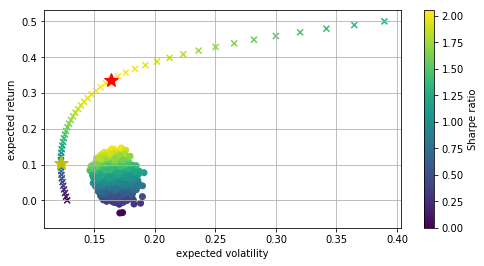

In [10]:
risk_free = 0.015
plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [11]:
print('Optimal Sharp Ratio:')
for i in range(n):
    print(ticker[i],':',opts['x'].round(3)[i])
print()
print('Expected Return', statistics(opts['x']).round(3)[0])
print('Expected Volitility', statistics(opts['x']).round(3)[1])
print('Sharp Ratio', statistics(opts['x']).round(3)[2])

Optimal Sharp Ratio:
CSCO : 0.0
SBGI : 0.0
ISSC : 0.0
IDSY : 0.0
AEIS : 0.0
TROW : 0.0
ISRG : 0.223
PRGX : 0.013
AMSC : 0.0
ADTN : 0.0
DRRX : 0.0
NBIX : 0.018
VRTX : 0.0
GILD : 0.0
AMKR : 0.0
FCFS : 0.0
EQIX : 0.0
STMP : 0.069
QUIK : 0.0
SALM : 0.0
HMSY : 0.0
MCRI : 0.051
SGMO : 0.0
LPTH : 0.022
ICUI : 0.243
MCHP : 0.0
NVMI : 0.041
TUES : 0.0
IVAC : 0.0
ARDM : 0.0
ABCB : 0.0
HUBG : 0.0
CORT : 0.021
EGOV : 0.0
CASH : 0.147
LNDC : 0.0
PEGA : 0.01
ARQL : 0.055
RCII : 0.0
CCRN : 0.0
DAIO : 0.005
DGII : 0.0
EMCI : 0.0
DISH : 0.0
RGEN : 0.0
LABL : 0.0
CPST : 0.0
STAF : 0.0
LJPC : 0.0
ULBI : 0.082

Expected Return 0.336
Expected Volitility 0.164
Sharp Ratio 2.05


In [12]:
print('Minimum Variance Portfolio:')
for i in range(n):
    print(ticker[i],':',optv['x'].round(3)[i])
print()
print('Expected Return', statistics(optv['x']).round(3)[0])
print('Expected Volitility', statistics(optv['x']).round(3)[1])
print('Sharp Ratio', statistics(optv['x']).round(3)[2])

Minimum Variance Portfolio:
CSCO : 0.033
SBGI : 0.003
ISSC : 0.038
IDSY : 0.058
AEIS : 0.0
TROW : 0.04
ISRG : 0.103
PRGX : 0.051
AMSC : 0.002
ADTN : 0.049
DRRX : 0.0
NBIX : 0.0
VRTX : 0.0
GILD : 0.044
AMKR : 0.0
FCFS : 0.034
EQIX : 0.12
STMP : 0.0
QUIK : 0.011
SALM : 0.005
HMSY : 0.0
MCRI : 0.0
SGMO : 0.0
LPTH : 0.015
ICUI : 0.044
MCHP : 0.0
NVMI : 0.0
TUES : 0.0
IVAC : 0.02
ARDM : 0.005
ABCB : 0.0
HUBG : 0.003
CORT : 0.0
EGOV : 0.003
CASH : 0.04
LNDC : 0.023
PEGA : 0.0
ARQL : 0.016
RCII : 0.0
CCRN : 0.0
DAIO : 0.021
DGII : 0.004
EMCI : 0.108
DISH : 0.009
RGEN : 0.0
LABL : 0.048
CPST : 0.0
STAF : 0.007
LJPC : 0.0
ULBI : 0.041

Expected Return 0.105
Expected Volitility 0.122
Sharp Ratio 0.855
